In [1]:
import pandas as pd
import os
import scipy
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, lfilter
from scipy.signal import savgol_filter

In [5]:
path = "./processed/"
files = os.listdir(path)
save_path = "./before_merge"

In [49]:
fs = 496
lowcut = 0.1
highcut = 10 

Helper functions

In [ ]:
def baseline(ecg):
    frequency = 496 # Hz
    kernel_size = frequency + 1
    wandering_baseline = scipy.signal.medfilt(ecg, kernel_size=kernel_size)

    # Flatten the EKG by subtracting the wandering baseline
    flattened_ekg = ecg - wandering_baseline
    return flattened_ekg

def butter_bandpass(lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

Pre-processing and saving

Processed file: drive05.csv
Processed file: drive06.csv
Processed file: drive07.csv
Processed file: drive08.csv
Processed file: drive10.csv
Processed file: drive11.csv
Processed file: drive13.csv
Processed file: drive14.csv
Processed file: drive15.csv


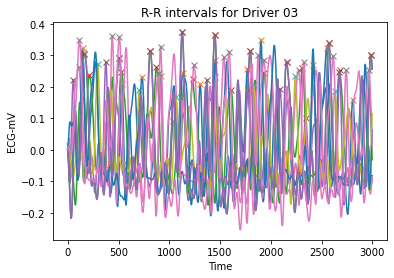

In [63]:
for file in files:
    df = pd.read_csv(path+file)
    ecg = df["ECG"]
    flat = baseline(ecg) 
    bp = butter_bandpass_filter(flat, lowcut, highcut, fs, order = 2)
    rr_peaks, _ = scipy.signal.find_peaks(bp, distance=fs*(30/60))

    # HR calc
    ecg_TS = np.array(rr_peaks)/fs
    HR = 60/(ecg_TS[1::] - ecg_TS[0:-1]) #60/rr interval

    
    hr = pd.DataFrame({"HR":HR})
    rp = pd.DataFrame({"Rpeak":rr_peaks})
    ec = pd.DataFrame({"ECG": bp, "label_3": df["label_3"], "label_2": df["label_2"]})

    hr.to_csv(save_path+"HR_" + file + ".csv", index = False)
    rp.to_csv(save_path+"rpeak_" + file + ".csv", index = False)
    ec.to_csv(save_path+"ECG_" + file + ".csv", index = False)
    print("Processed file: "+ file)